In [20]:
import csv
import sqlite3

# Connect to SQLite database
connection = sqlite3.connect('miscellaneous.db')
# Create cursor object
cursor = connection.cursor()

In [21]:
cursor.execute('''
                CREATE TABLE IF NOT EXISTS sales(
                sales_id INTEGER PRIMARY KEY,
                sales_person TEXT,
                sales_amount REAL,
                sales_date Date)
                '''
);

In [ ]:
def add_data_to_database(data):
    try:
        # Connect to database
        connection = sqlite3.connect('miscellaneous.db')
        # Create cursor object
        cursor = connection.cursor()
        with open(data, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            # Skip the header row
            next(csv_reader)
            # Insert data into the table
            for row in csv_reader:
                cursor.execute('INSERT INTO sales VALUES (?, ?, ?, ?)', row)
            connection.commit()
    except Exception as e:
        print(f'Error: {e}')
    finally:
        # close the connection
        connection.close()

# Load CSV file
data = "/content/company_sales_data.csv"
add_data_to_database(data)

In [23]:
# Loading the SQL magic
%load_ext sql
# Connecting to the SQLite database
%sql sqlite:///miscellaneous.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [57]:
%%sql
SELECT * FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45
3,Anja MAAAller,1999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,2023-05-30 10:00:55


In [28]:
%%sql
SELECT DATE(sales_date) AS date
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


date
2023-01-10
2023-02-15
2023-03-20


In [29]:
%%sql
SELECT sales_person, DATE('now') AS
       date_of_suspension
FROM sales
WHERE sales_person = 'Yuki Nakamura';

 * sqlite:///miscellaneous.db
Done.


sales_person,date_of_suspension
Yuki Nakamura,2025-07-22


In [30]:
%%sql
SELECT
    sales_id,
    sales_person,
    sales_amount,
    DATE(sales_date, '+1 year') AS updated_date
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,updated_date
1,Giovanni Rossi,1500.5,2024-01-10
2,Yuki Nakamura,2300.75,2024-02-15
3,Anja MAAAller,1999.99,2024-03-20


In [31]:
%%sql
SELECT
    sales_id,
    sales_person,
    sales_amount,
    DATE(sales_date, '-6 months') AS updated_sales_date
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,updated_sales_date
1,Giovanni Rossi,1500.5,2022-07-10
2,Yuki Nakamura,2300.75,2022-08-15
3,Anja MAAAller,1999.99,2022-09-20


In [32]:
%%sql
SELECT JULIANDAY('2023-03-20') - JULIANDAY('2023-01-10')
AS difference_between_dates;

 * sqlite:///miscellaneous.db
Done.


difference_between_dates
69.0


In [33]:
%%sql
SELECT STRFTIME('%Y', sales_date) AS year
FROM sales
LIMIT 2;

 * sqlite:///miscellaneous.db
Done.


year
2023
2023


In [34]:
%%sql
SELECT STRFTIME('%m', sales_date) AS month
FROM sales
LIMIT 2;

 * sqlite:///miscellaneous.db
Done.


month
01
02


In [35]:
%%sql
SELECT STRFTIME('%H:%M:%S', sales_date) AS time
FROM sales
LIMIT 2;

 * sqlite:///miscellaneous.db
Done.


time
10:15:30
14:25:45


In [36]:
%%sql
SELECT STRFTIME('%m-%d-%Y', sales_date) AS date
FROM sales
LIMIT 2;

 * sqlite:///miscellaneous.db
Done.


date
01-10-2023
02-15-2023


In [37]:
%%sql
SELECT * FROM sales
WHERE STRFTIME('%Y-%m-%d', sales_date)
BETWEEN DATE('2023-02-15') AND DATE('2023-05-30');

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45
3,Anja MAAAller,1999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,2023-05-30 10:00:55


In [42]:
%%sql
SELECT
    sales_person,
    LENGTH(sales_person) AS num_of_characters_in_name
FROM sales
ORDER BY num_of_characters_in_name DESC
LIMIT 1;

 * sqlite:///miscellaneous.db
Done.


sales_person,num_of_characters_in_name
Olivier Dubois,18


In [43]:
%%sql
SELECT
    sales_person,
    LENGTH(TRIM(sales_person)) <> LENGTH(Sales_person)
    AS has_leading_trailing_whitespace
FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,has_leading_trailing_whitespace
Giovanni Rossi,0
Yuki Nakamura,0
Anja MAAAller,1
Wei Zhang,0
Olivier Dubois,1
Aditi Sharma,0
JAAArgen Schneider,0
Min-Soo Kim,1
Katarzyna Nowak,0
Hiroshi Tanaka,0


In [44]:
%%sql
SELECT
    UPPER(sales_person) AS names_in_uppercase
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


names_in_uppercase
GIOVANNI ROSSI
YUKI NAKAMURA
ANJA MAAALLER


In [45]:
%%sql
SELECT
    LOWER(sales_person) AS names_in_lowercase
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


names_in_lowercase
giovanni rossi
yuki nakamura
anja maaaller


In [19]:
# %%sql
# DROP TABLE sales;

 * sqlite:///miscellaneous.db
Done.


[]

In [46]:
%%sql
SELECT
    REPLACE(sales_person, ' ', '')
    AS name_with_no_space
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


name_with_no_space
GiovanniRossi
YukiNakamura
AnjaMAAAller


In [47]:
%%sql
SELECT
    REPLACE(sales_person, ' ', '_')
    AS name_with_underscore
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


name_with_underscore
Giovanni_Rossi
Yuki_Nakamura
___Anja_MAAAller


In [48]:
%%sql
SELECT
    TRIM(sales_person) || ' made a sale of ' || sales_amount || ' on ' ||
    DATE(sales_date)
    AS sale_summary
FROM sales;

 * sqlite:///miscellaneous.db
Done.


sale_summary
Giovanni Rossi made a sale of 1500.5 on 2023-01-10
Yuki Nakamura made a sale of 2300.75 on 2023-02-15
Anja MAAAller made a sale of 1999.99 on 2023-03-20
Wei Zhang made a sale of 3500.0 on 2023-04-25
Olivier Dubois made a sale of 1200.0 on 2023-05-30
Aditi Sharma made a sale of 4100.5 on 2023-06-05
JAAArgen Schneider made a sale of 3100.25 on 2023-07-10
Min-Soo Kim made a sale of 2700.75 on 2023-08-15
Katarzyna Nowak made a sale of 3300.1 on 2023-09-20
Hiroshi Tanaka made a sale of 2500.0 on 2023-10-25


In [49]:
%%sql
SELECT
    TRIM(sales_person) || '_' || sales_amount
    AS sales_person_and_amount
FROM sales
LIMIT 3;

 * sqlite:///miscellaneous.db
Done.


sales_person_and_amount
Giovanni Rossi_1500.5
Yuki Nakamura_2300.75
Anja MAAAller_1999.99


In [50]:
%%sql
SELECT INSTR(sales_person, 'rossi')
    AS position_of_rossi
FROM sales
WHERE INSTR(sales_person, 'Rossi') > 0;

 * sqlite:///miscellaneous.db
Done.


position_of_rossi
0


In [51]:
%%sql
SELECT
    INSTR(sales_person, 'rossi')
    AS position_of_rossi
FROM sales
WHERE INSTR(sales_person, 'Rossi') > 0;

 * sqlite:///miscellaneous.db
Done.


position_of_rossi
0


In [52]:
%%sql
SELECT sales_person, INSTR(LOWER(sales_person), 'rossi')
    AS position_of_rossi
FROM sales
WHERE INSTR(LOWER(sales_person), 'rossi') > 0;

 * sqlite:///miscellaneous.db
Done.


sales_person,position_of_rossi
Giovanni Rossi,10


In [60]:
%%sql
SELECT sales_person, SUBSTR(sales_person, 4, 6)
    AS substring
FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_person,substring
Giovanni Rossi,vanni
Yuki Nakamura,i Naka
Anja MAAAller,Anja M
Wei Zhang,Zhang
Olivier Dubois,Olivi


In [65]:
%%sql
SELECT sales_person,
        printf("%30s", SUBSTR(TRIM(sales_person), INSTR(TRIM(sales_person), ' ') + 1))
        AS last_name_of_seller
FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_person,last_name_of_seller
Giovanni Rossi,Rossi
Yuki Nakamura,Nakamura
Anja MAAAller,MAAAller
Wei Zhang,Zhang
Olivier Dubois,Dubois


In [68]:
%%sql
SELECT
    TRIM(sales_person) AS sales_person,
    (SELECT AVG(sales_amount) FROM sales) -- Subquery
     AS bonus_pay
FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,bonus_pay
Giovanni Rossi,2620.2839999999997
Yuki Nakamura,2620.2839999999997
Anja MAAAller,2620.2839999999997
Wei Zhang,2620.2839999999997
Olivier Dubois,2620.2839999999997
Aditi Sharma,2620.2839999999997
JAAArgen Schneider,2620.2839999999997
Min-Soo Kim,2620.2839999999997
Katarzyna Nowak,2620.2839999999997
Hiroshi Tanaka,2620.2839999999997


In [69]:
%%sql
SELECT
    sales_month,
    SUM(sales_amount) AS monthly_sales,
    SUM(sales_amount) / 1.01 AS monthly_sales_in_euros
FROM
    -- Subquery inside the FROM clause
    (SELECT
        sales_amount,
        STRFTIME('%m', sales_date) AS sales_month
     FROM sales)
GROUP BY sales_month
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_month,monthly_sales,monthly_sales_in_euros
01,1500.5,1485.6435643564357
02,2300.75,2277.970297029703
03,1999.99,1980.1881188118812
04,3500.0,3465.3465346534654
05,1200.0,1188.118811881188


In [70]:
%%sql
SELECT
    --This calculates the total sales of top 3 sales
    (SELECT SUM(sales_amount)
     FROM
          (SELECT sales_amount
           FROM sales
           ORDER BY sales_amount DESC
           LIMIT 3) AS top_sales) AS total_top_3_sales,

    --This calculates the total sales of bottom 3 sales
    (SELECT SUM(sales_amount)
     FROM
           (SELECT sales_amount
           FROM sales
           ORDER BY sales_amount ASC
           LIMIT 3) AS bottom_sales) AS total_bottom_3_sales;

 * sqlite:///miscellaneous.db
Done.


total_top_3_sales,total_bottom_3_sales
10900.6,4700.49


In [71]:
%%sql
SELECT
    sales_id,
    sales_person,
    sales_amount
FROM sales
WHERE sales_amount = (SELECT MAX(sales_amount) FROM sales);

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount
6,Aditi Sharma,4100.5


In [72]:
%%sql
SELECT
    sales_person,
    SUM(sales_amount) AS total_sales
FROM sales
GROUP BY sales_person
HAVING SUM(sales_amount) > (SELECT AVG(sales_amount) FROM sales);

 * sqlite:///miscellaneous.db
Done.


sales_person,total_sales
Min-Soo Kim,2700.75
Aditi Sharma,4100.5
JAAArgen Schneider,3100.25
Katarzyna Nowak,3300.1
Wei Zhang,3500.0


In [73]:
%%sql
-- step 1. First Creating a CTE table
WITH sales_march_and_april AS (
    SELECT
        sales_date,
        sales_amount
    FROM sales
    WHERE STRFTIME('%m', sales_date) = '03' OR
                  STRFTIME('%m', sales_date) = '04'
)
-- Step 2. Query the CTE table
SELECT
    SUM(sales_amount) AS total_march_april_sales
FROM sales_march_and_april;

 * sqlite:///miscellaneous.db
Done.


total_march_april_sales
5499.99


In [74]:
%%sql
WITH top_sales AS (
    SELECT sales_amount
    FROM sales
    ORDER BY
    sales_amount DESC
    LIMIT 3
),
bottom_sales AS(
    SELECT sales_amount
    FROM sales
    ORDER BY
    sales_amount ASC
    LIMIT 3
)
-- Querying the two CTEs using subqueries
SELECT
    (SELECT SUM(sales_amount) FROM top_sales)
    AS total_top_3_sales,
    (SELECT SUM(sales_amount) FROM bottom_sales)
    AS total_bottom_3_sales

 * sqlite:///miscellaneous.db
Done.


total_top_3_sales,total_bottom_3_sales
10900.6,4700.49


In [75]:
%%sql
WITH average_sales AS (
    -- Nested CTE to get top 3 sales amounts
    WITH top_sales AS (
        SELECT sales_amount
        FROM sales
        ORDER BY sales_amount DESC
        LIMIT 3
    )
    -- Outer CTE that calculates the average of top 3 sales
    SELECT AVG(sales_amount) AS top_3_average_sales
    FROM top_sales
)
-- Final query that converts the average sales amount to euros
SELECT top_3_average_sales / 1.01 AS top_3_average_sales_in_euros
FROM average_sales;

 * sqlite:///miscellaneous.db
Done.


top_3_average_sales_in_euros
3597.5577557755773


In [76]:
%%sql
SELECT
    sales_person,
    sales_amount,
    CASE
        WHEN sales_amount >= 3000 THEN 'Target reached'
        ELSE 'Target not reached'
    END AS sales_target
FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,sales_target
Giovanni Rossi,1500.5,Target not reached
Yuki Nakamura,2300.75,Target not reached
Anja MAAAller,1999.99,Target not reached
Wei Zhang,3500.0,Target reached
Olivier Dubois,1200.0,Target not reached
Aditi Sharma,4100.5,Target reached
JAAArgen Schneider,3100.25,Target reached
Min-Soo Kim,2700.75,Target not reached
Katarzyna Nowak,3300.1,Target reached
Hiroshi Tanaka,2500.0,Target not reached


In [77]:
%%sql
SELECT
    sales_person,
    sales_amount,
    CASE
        WHEN sales_amount >= 3000 THEN 'Target reached'
        WHEN sales_amount BETWEEN 2000 AND 2999
        THEN 'Almost reached target'
        ELSE 'Target not reached'
    END AS sales_target
FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,sales_target
Giovanni Rossi,1500.5,Target not reached
Yuki Nakamura,2300.75,Almost reached target
Anja MAAAller,1999.99,Target not reached
Wei Zhang,3500.0,Target reached
Olivier Dubois,1200.0,Target not reached
Aditi Sharma,4100.5,Target reached
JAAArgen Schneider,3100.25,Target reached
Min-Soo Kim,2700.75,Almost reached target
Katarzyna Nowak,3300.1,Target reached
Hiroshi Tanaka,2500.0,Almost reached target


In [78]:
%%sql
WITH sales_target AS(
    SELECT
    sales_person,
    sales_amount,
    CASE
        WHEN sales_amount >= 3000 THEN 'Target reached'
        WHEN sales_amount BETWEEN 2000 AND 2999
        THEN 'Almost reached target'
        ELSE 'Target not reached'
    END AS sales_target
FROM sales
)
-- Querying the CTE
SELECT sales_person, sales_amount, sales_target
FROM sales_target
WHERE sales_target = 'Target reached';

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,sales_target
Wei Zhang,3500.0,Target reached
Aditi Sharma,4100.5,Target reached
JAAArgen Schneider,3100.25,Target reached
Katarzyna Nowak,3300.1,Target reached


In [79]:
%%sql
-- Adding a new column to sales table
ALTER TABLE sales
ADD costs_amount REAL;

 * sqlite:///miscellaneous.db
Done.


[]

In [80]:
%%sql
SELECT * FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date,costs_amount
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30,None
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45,None
3,Anja MAAAller,1999.99,2023-03-20 09:10:00,None
4,Wei Zhang,3500.0,2023-04-25 16:45:20,None
5,Olivier Dubois,1200.0,2023-05-30 10:00:55,None


In [81]:
%%sql
UPDATE sales
SET costs_amount = sales_amount * 0.3;

 * sqlite:///miscellaneous.db
10 rows affected.


[]

In [82]:
%%sql
SELECT * FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date,costs_amount
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30,450.15
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45,690.225
3,Anja MAAAller,1999.99,2023-03-20 09:10:00,599.997
4,Wei Zhang,3500.0,2023-04-25 16:45:20,1050.0
5,Olivier Dubois,1200.0,2023-05-30 10:00:55,360.0


In [84]:
%%sql
UPDATE sales
SET sales_person = TRIM(sales_person)
WHERE LENGTH(sales_person) != LENGTH(TRIM(sales_person));

 * sqlite:///miscellaneous.db
0 rows affected.


[]

In [85]:
%%sql
ALTER TABLE sales
DROP COLUMN costs_amount;

 * sqlite:///miscellaneous.db
Done.


[]

In [86]:
%%sql
SELECT * FROM sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45
3,Anja MAAAller,1999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,2023-05-30 10:00:55


In [87]:
%%sql
ALTER TABLE sales
RENAME TO sales_data;

 * sqlite:///miscellaneous.db
Done.


[]

In [88]:
%%sql
ALTER TABLE sales_data
RENAME TO sales;

 * sqlite:///miscellaneous.db
Done.


[]

In [89]:
%%sql
INSERT INTO sales
        (sales_id, sales_person, sales_amount, sales_date)
VALUES (11, 'Alice Kijo', 3000, '2023-05-28 11:00:55');

 * sqlite:///miscellaneous.db
1 rows affected.


[]

In [90]:
%%sql
SELECT * FROM sales
WHERE sales_person = 'Alice Kijo';

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
11,Alice Kijo,3000.0,2023-05-28 11:00:55


In [91]:
%%sql
INSERT INTO sales
VALUES (12, 'Kim Mau', 3100, '2023-06-21 14:30:55'),
       (13, 'Peter Silo', 1100, '2023-07-10 12:00:55');

 * sqlite:///miscellaneous.db
2 rows affected.


[]

In [92]:
%%sql
INSERT OR IGNORE INTO sales
VALUES (12, 'Kim Mau', 3100, '2023-06-21 14:30:55'),
       (13, 'Peter Silo', 1100, '2023-07-10 12:00:55');

 * sqlite:///miscellaneous.db
0 rows affected.


[]

In [93]:
%%sql
DELETE FROM sales
WHERE sales_person = 'Peter Silo';

 * sqlite:///miscellaneous.db
1 rows affected.


[]

In [94]:
%%sql
SELECT
    CASE
        WHEN EXISTS (SELECT 1 FROM sales
        WHERE sales_person = 'Peter Silo')
        THEN 'Peter in the table'
        ELSE 'Peter is not in the table'
    END AS status_of_peter;

 * sqlite:///miscellaneous.db
Done.


status_of_peter
Peter is not in the table


In [95]:
%%sql
PRAGMA table_info(sales);

 * sqlite:///miscellaneous.db
Done.


cid,name,type,notnull,dflt_value,pk
0,sales_id,INTEGER,0,None,1
1,sales_person,TEXT,0,None,0
2,sales_amount,REAL,0,None,0
3,sales_date,Date,0,None,0


In [97]:
%%sql
SELECT COUNT(*) AS number_of_null_values
FROM sales WHERE sales_amount IS NULL;

 * sqlite:///miscellaneous.db
Done.


number_of_null_values
0


In [98]:
%%sql
SELECT COUNT(*) AS duplicates_count
FROM sales
GROUP BY sales_person
HAVING COUNT(*) > 1;

 * sqlite:///miscellaneous.db
Done.


duplicates_count


In [99]:
%%sql
SELECT
    CASE
        WHEN EXISTS (SELECT 1 FROM sales
                    GROUP BY sales_person
                    HAVING COUNT(*) > 1)
        THEN 'Duplicates in the column'
        ELSE 'No duplicates in the column'
    END AS duplicates_check;

 * sqlite:///miscellaneous.db
Done.


duplicates_check
No duplicates in the column


In [100]:
%%sql
SELECT
    CASE
        WHEN EXISTS (SELECT 1
                     FROM sales
                     GROUP BY sales_id, sales_person,
                             sales_amount, sales_date
                     HAVING COUNT(*) > 1)
        THEN 'Duplicates in the table'
        ELSE 'No duplicates in the table'
    END AS duplicates_check;

 * sqlite:///miscellaneous.db
Done.


duplicates_check
No duplicates in the table


In [101]:
%%sql
-- Select oldest record for each person
WITH duplicates AS (
    SELECT sales_id
    FROM sales
    WHERE sales_id NOT IN (
        SELECT MIN(sales_id)
        FROM sales
        GROUP BY sales_person
    )
)
-- Delete oldest records for each person
DELETE FROM sales
WHERE sales_id IN (SELECT sales_id FROM duplicates);

 * sqlite:///miscellaneous.db
Done.


[]

In [102]:
%%sql
SELECT * FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45
3,Anja MAAAller,1999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,2023-05-30 10:00:55
6,Aditi Sharma,4100.5,2023-06-05 08:05:10
7,JAAArgen Schneider,3100.25,2023-07-10 18:20:30
8,Min-Soo Kim,2700.75,2023-08-15 20:40:15
9,Katarzyna Nowak,3300.1,2023-09-20 11:35:25
10,Hiroshi Tanaka,2500.0,2023-10-25 13:50:40


In [103]:
%%sql
SELECT
    REPLACE(sales_person, 'AAA', 'u') AS cleaned_column
FROM sales
WHERE sales_person IN ('Anja MAAAller', 'JAAArgen Schneider');

 * sqlite:///miscellaneous.db
Done.


cleaned_column
Anja Muller
Jurgen Schneider


In [104]:
%%sql
UPDATE sales
SET sales_person = REPLACE(sales_person, 'AAA', 'u')
WHERE sales_person IN ('Anja MAAAller', 'JAAArgen Schneider');

 * sqlite:///miscellaneous.db
2 rows affected.


[]

In [105]:
%%sql
SELECT * FROM sales
WHERE sales_person IN ('Anja Muller', 'Jurgen Schneider');

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
3,Anja Muller,1999.99,2023-03-20 09:10:00
7,Jurgen Schneider,3100.25,2023-07-10 18:20:30


In [106]:
%%sql
SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang'

UNION -- Using union to combine results

SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Aditi Sharma';

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount
Aditi Sharma,4100.5
Wei Zhang,3500.0


In [107]:
%%sql
SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang'

UNION -- Using union to combine results

SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang'

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount
Wei Zhang,3500.0


#### Using UNION ALL operator

In [108]:
%%sql
SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang'

UNION ALL -- Using union all to combine results

SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang'

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount
Wei Zhang,3500.0
Wei Zhang,3500.0


In [109]:
%%sql
SELECT STRFTIME('%m', sales_date) AS common_sales_month
FROM sales
WHERE sales_person = 'Alice Kijo'

INTERSECT -- Using intersect to find common row

SELECT STRFTIME('%m', sales_date) AS common_sales_month
FROM sales
WHERE sales_person = 'Olivier Dubois'

 * sqlite:///miscellaneous.db
Done.


common_sales_month
05


In [110]:
%%sql
SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang' OR sales_person = 'Yuki Nakamura'

EXCEPT -- Using EXCEPT to get results of first query not in second query

SELECT sales_person, sales_amount
FROM sales
WHERE sales_person = 'Wei Zhang' OR sales_person = 'Giovanni Rossi';

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount
Yuki Nakamura,2300.75


#### Adding a table to the database

In [111]:
%%sql
CREATE TABLE IF NOT EXISTS costs(
    cost_id INTEGER PRIMARY KEY,
    names TEXT,
    costs_amount INTEGER,
    sales_id INTEGER NOT NULL,
    FOREIGN KEY (sales_id)REFERENCES sales (sales_id)
);

 * sqlite:///miscellaneous.db
Done.


[]

In [ ]:
def add_cost_data(data):
    try:
        # Connect to SQLite database
        connection = sqlite3.connect('miscellaneous.db')
        # Create cursor object
        cursor = connection.cursor()

        # Open the CSV file and read its content
        with open(data, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            # Skip the header row
            next(csv_reader)
            # Insert data into the table
            for row in csv_reader:
                cursor.execute('INSERT INTO costs VALUES (?, ?, ?, ?)', row)
        connection.commit()
    except Exception as e:
        print(f'Error: {e}')
    finally:
        connection.close()

data = "/content/company_costs_data.csv"
add_cost_data(data)

In [113]:
%%sql
SELECT * FROM costs;

 * sqlite:///miscellaneous.db
Done.


cost_id,names,costs_amount,sales_id
101,Giovanni Rossi,800.5,1
102,Yuki Nakamura,1100.75,2
103,Anja Muller,999.99,3
104,Wei Zhang,2500,4
105,Olivier Dubois,600,5
106,Aditi Sharma,3100.5,6
107,Jurgen Schneider,1100.25,7
108,Min-Soo Kim,1700.75,8
109,Katarzyna Nowak,2100.1,9
110,Hiroshi Tanaka,1500,10


In [114]:
%%sql
SELECT * FROM sales;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,sales_date
1,Giovanni Rossi,1500.5,2023-01-10 10:15:30
2,Yuki Nakamura,2300.75,2023-02-15 14:25:45
3,Anja Muller,1999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,2023-05-30 10:00:55
6,Aditi Sharma,4100.5,2023-06-05 08:05:10
7,Jurgen Schneider,3100.25,2023-07-10 18:20:30
8,Min-Soo Kim,2700.75,2023-08-15 20:40:15
9,Katarzyna Nowak,3300.1,2023-09-20 11:35:25
10,Hiroshi Tanaka,2500.0,2023-10-25 13:50:40


#### Left join

In [115]:
%%sql
SELECT
    sales.sales_id,-- From sales table
    sales.sales_person, -- From sales table
    sales. sales_amount, -- From sales table
    costs.costs_amount -- From cost table
FROM sales -- sales is the Left table

LEFT JOIN costs -- costs is the right table

-- Joining two tables on the common sales_id column
ON sales.sales_id = costs.sales_id;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount
1,Giovanni Rossi,1500.5,800.5
2,Yuki Nakamura,2300.75,1100.75
3,Anja Muller,1999.99,999.99
4,Wei Zhang,3500.0,2500
5,Olivier Dubois,1200.0,600
6,Aditi Sharma,4100.5,3100.5
7,Jurgen Schneider,3100.25,1100.25
8,Min-Soo Kim,2700.75,1700.75
9,Katarzyna Nowak,3300.1,2100.1
10,Hiroshi Tanaka,2500.0,1500


In [116]:
%%sql
SELECT
    s.sales_id,
    s.sales_person, -- From sales table
    s.sales_amount, -- From sales table
    c.costs_amount -- From cost table
FROM sales s -- sales is the Left table

LEFT JOIN costs c -- costs is the right table

-- Joining two tables on the common sales_id column
ON s.sales_id = c.sales_id;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount
1,Giovanni Rossi,1500.5,800.5
2,Yuki Nakamura,2300.75,1100.75
3,Anja Muller,1999.99,999.99
4,Wei Zhang,3500.0,2500
5,Olivier Dubois,1200.0,600
6,Aditi Sharma,4100.5,3100.5
7,Jurgen Schneider,3100.25,1100.25
8,Min-Soo Kim,2700.75,1700.75
9,Katarzyna Nowak,3300.1,2100.1
10,Hiroshi Tanaka,2500.0,1500


#### Right join

In [119]:
%%sql
SELECT
    s.sales_id,
    s.sales_person, -- From sales table
    s.sales_amount, -- From sales table
    c.costs_amount -- From cost table
FROM costs c -- Costs is the left table

LEFT JOIN sales s -- Sales is the right table

-- Joining two tables on the common sales_id column
ON s.sales_id = c.sales_id;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount
1,Giovanni Rossi,1500.5,800.5
2,Yuki Nakamura,2300.75,1100.75
3,Anja Muller,1999.99,999.99
4,Wei Zhang,3500.0,2500
5,Olivier Dubois,1200.0,600
6,Aditi Sharma,4100.5,3100.5
7,Jurgen Schneider,3100.25,1100.25
8,Min-Soo Kim,2700.75,1700.75
9,Katarzyna Nowak,3300.1,2100.1
10,Hiroshi Tanaka,2500.0,1500


#### INNER JOIN

In [120]:
%%sql
SELECT
    s.sales_id,
    s.sales_person, -- From sales table
    s.sales_amount, -- From sales table
    c.costs_amount -- From costs table
FROM sales s

INNER JOIN costs c

-- Joining two tables on the common sales_id column
ON s.sales_id = c.sales_id;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount
1,Giovanni Rossi,1500.5,800.5
2,Yuki Nakamura,2300.75,1100.75
3,Anja Muller,1999.99,999.99
4,Wei Zhang,3500.0,2500
5,Olivier Dubois,1200.0,600
6,Aditi Sharma,4100.5,3100.5
7,Jurgen Schneider,3100.25,1100.25
8,Min-Soo Kim,2700.75,1700.75
9,Katarzyna Nowak,3300.1,2100.1
10,Hiroshi Tanaka,2500.0,1500


#### Full Join

In [121]:
%%sql
-- Perfoming the left join operation
SELECT
    s.sales_id,
    s.sales_person,
    s.sales_amount,
    c.costs_amount
FROM sales s
LEFT JOIN costs c
ON s.sales_id = c.sales_id

UNION  -- Joining two tables

-- Perfoming right join by reversing left join
SELECT
    s.sales_id,
    c.names,
    s.sales_amount,
    c.costs_amount
FROM costs c
LEFT JOIN sales s
ON s.sales_id = c.sales_id;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount
1,Giovanni Rossi,1500.5,800.5
2,Yuki Nakamura,2300.75,1100.75
3,Anja Muller,1999.99,999.99
4,Wei Zhang,3500.0,2500
5,Olivier Dubois,1200.0,600
6,Aditi Sharma,4100.5,3100.5
7,Jurgen Schneider,3100.25,1100.25
8,Min-Soo Kim,2700.75,1700.75
9,Katarzyna Nowak,3300.1,2100.1
10,Hiroshi Tanaka,2500.0,1500


In [122]:
%%sql
SELECT
    sales_person,
    sales_amount,
    costs_amount
FROM sales
-- Perfom natural join
NATURAL JOIN costs
WHERE sales_amount > 3500;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,costs_amount
Aditi Sharma,4100.5,3100.5


In [123]:
%%sql
SELECT
    s.sales_person,
    SUM(s.sales_amount) AS total_revenue,
    SUM(c.costs_amount) AS total_costs
FROM sales s
INNER JOIN costs c ON s.sales_person = c.names
GROUP BY s.sales_person
HAVING total_costs < (0.50 * total_revenue );

 * sqlite:///miscellaneous.db
Done.


sales_person,total_revenue,total_costs
Anja Muller,1999.99,999.99
Jurgen Schneider,3100.25,1100.25
Yuki Nakamura,2300.75,1100.75


In [124]:
%%sql
SELECT
    s.sales_person,
    c.costs_amount
FROM sales s
CROSS JOIN costs c
WHERE s.sales_person ='Wei Zhang';

 * sqlite:///miscellaneous.db
Done.


sales_person,costs_amount
Wei Zhang,800.5
Wei Zhang,1100.75
Wei Zhang,999.99
Wei Zhang,2500
Wei Zhang,600
Wei Zhang,3100.5
Wei Zhang,1100.25
Wei Zhang,1700.75
Wei Zhang,2100.1
Wei Zhang,1500


In [125]:
%%sql
-- Creating a view using inner join
CREATE VIEW sales_with_costs AS
SELECT
    s.sales_id,
    s.sales_person,
    s.sales_amount,
    c.costs_amount,
    s.sales_date
FROM sales s
INNER JOIN costs c
ON s.sales_id = c.sales_id;

 * sqlite:///miscellaneous.db
Done.


[]

In [127]:
%%sql
SELECT * FROM sales_with_costs
LIMIT 6;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,sales_amount,costs_amount,sales_date
1,Giovanni Rossi,1500.5,800.5,2023-01-10 10:15:30
2,Yuki Nakamura,2300.75,1100.75,2023-02-15 14:25:45
3,Anja Muller,1999.99,999.99,2023-03-20 09:10:00
4,Wei Zhang,3500.0,2500,2023-04-25 16:45:20
5,Olivier Dubois,1200.0,600,2023-05-30 10:00:55
6,Aditi Sharma,4100.5,3100.5,2023-06-05 08:05:10


In [128]:
%%sql
SELECT
    yuki.yuki_profit,
    hiro.hiroshi_profit,
    yuki.yuki_profit - hiro.hiroshi_profit AS difference
FROM
-- Calculating yuki profit
    (SELECT sales_amount - costs_amount  AS yuki_profit
    FROM sales_with_costs -- querying virtual table
    WHERE sales_person = 'Yuki Nakamura')
    AS yuki,
-- Calculating Hiroshi profit
    (SELECT sales_amount - costs_amount  AS hiroshi_profit
    FROM sales_with_costs
    WHERE sales_person = 'Hiroshi Tanaka')
    AS hiro;

 * sqlite:///miscellaneous.db
Done.


yuki_profit,hiroshi_profit,difference
1200.0,1000.0,200.0


In [129]:
%%sql
DROP VIEW IF EXISTS sales_with_costs;

 * sqlite:///miscellaneous.db
Done.


[]

In [130]:
%%sql
CREATE TABLE IF NOT EXISTS inter_sales(
    sales_id INTEGER PRIMARY KEY,
    sales_person TEXT,
    country TEXT,
    sales_amount REAL,
    date DATE);

 * sqlite:///miscellaneous.db
Done.


[]

In [ ]:
def add_data_to_database(data):
    try:
        # Connect to SQLite database
        connection = sqlite3.connect('miscellaneous.db')
        # Create cursor object
        cursor = connection.cursor()
        with open(data, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            # Skip the header row
            next(csv_reader)
            # Insert data into the table
            for row in csv_reader:
                cursor.execute('INSERT INTO inter_sales VALUES (?, ?, ?, ?, ?)', row)
        connection.commit()
    except Exception as e:
        print(f'Error:{e}')
    finally:
        connection.close()

# Loading CSV file
data = "/content/international_sales.csv"
add_data_to_database(data)

In [132]:
%%sql
SELECT * FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


sales_id,sales_person,country,sales_amount,date
1,Avon,South Africa,1500.0,15-02-2024
2,Moses,Turkey,800.0,17-01-2024
3,Peter,South Africa,1200.0,20-01-2024
4,Charlie,Turkey,1800.0,01-02-2024
5,Assat,Turkey,900.0,05-02-2024
6,Afet,Turkey,2500.0,10-02-2024
7,Luke,South Africa,1200.0,12-02-2024
8,John,South Africa,1100.0,16-02-2024
9,Matt,South Africa,1600.0,20-02-2024
10,Ken,Turkey,2500.0,25-02-2024


In [133]:
%%sql
SELECT
    sales_person,
    sales_amount,
    ROW_NUMBER() OVER (ORDER BY sales_amount DESC)
    AS rank
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,rank
Afet,2500.0,1
Ken,2500.0,2
Charlie,1800.0,3
Matt,1600.0,4
Avon,1500.0,5
Peter,1200.0,6
Luke,1200.0,7
John,1100.0,8
Assat,900.0,9
Moses,800.0,10


In [134]:
%%sql
SELECT
    sales_person
    sales_amount,
    RANK() OVER (ORDER BY sales_amount DESC)
    AS rank
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


sales_amount,rank
Afet,1
Ken,1
Charlie,3
Matt,4
Avon,5
Peter,6
Luke,6
John,8
Assat,9
Moses,10


In [135]:
%%sql
-- Assigning a rank to each person
WITH rank_sales AS (SELECT
    sales_person,
    sales_amount,
    RANK() OVER (ORDER BY sales_amount DESC)
    AS rank
    FROM inter_sales)

-- Retrieving the number 1 ranked salespersons
SELECT
    sales_person,
    sales_amount,
    rank
FROM rank_sales
WHERE rank = 1;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,rank
Afet,2500.0,1
Ken,2500.0,1


In [136]:
%%sql
SELECT
    country,
    sales_person,
    sales_amount,
    DENSE_RANK() OVER (ORDER BY sales_amount DESC)
    AS rank
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


country,sales_person,sales_amount,rank
Turkey,Afet,2500.0,1
Turkey,Ken,2500.0,1
Turkey,Charlie,1800.0,2
South Africa,Matt,1600.0,3
South Africa,Avon,1500.0,4
South Africa,Peter,1200.0,5
South Africa,Luke,1200.0,5
South Africa,John,1100.0,6
Turkey,Assat,900.0,7
Turkey,Moses,800.0,8


In [137]:
%%sql
SELECT
    country,
    sales_person,
    sales_amount,
    DENSE_RANK() OVER (PARTITION BY country
    ORDER BY sales_amount DESC)
    AS rank
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


country,sales_person,sales_amount,rank
South Africa,Matt,1600.0,1
South Africa,Avon,1500.0,2
South Africa,Peter,1200.0,3
South Africa,Luke,1200.0,3
South Africa,John,1100.0,4
Turkey,Afet,2500.0,1
Turkey,Ken,2500.0,1
Turkey,Charlie,1800.0,2
Turkey,Assat,900.0,3
Turkey,Moses,800.0,4


In [138]:
%%sql
-- Ranking sellers in each country
WITH rank_sellers AS (
    SELECT
        country,
        sales_person,
        sales_amount,
        DENSE_RANK() OVER (PARTITION BY country
        ORDER BY sales_amount DESC)
        AS rank
FROM inter_sales)
-- Retrieving top sellers each country
SELECT
    country,
    sales_person,
    sales_amount
FROM rank_sellers
WHERE rank = 1;

 * sqlite:///miscellaneous.db
Done.


country,sales_person,sales_amount
South Africa,Matt,1600.0
Turkey,Afet,2500.0
Turkey,Ken,2500.0


In [139]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    SUM(sales_amount) OVER (PARTITION BY country
    ORDER BY date ASC)
    AS cumulative_sales
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,cumulative_sales
12-02-2024,South Africa,1200.0,1200.0
15-02-2024,South Africa,1500.0,2700.0
16-02-2024,South Africa,1100.0,3800.0
20-01-2024,South Africa,1200.0,5000.0
20-02-2024,South Africa,1600.0,6600.0
01-02-2024,Turkey,1800.0,1800.0
05-02-2024,Turkey,900.0,2700.0
10-02-2024,Turkey,2500.0,5200.0
17-01-2024,Turkey,800.0,6000.0
25-02-2024,Turkey,2500.0,8500.0


In [140]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    AVG(sales_amount) OVER (PARTITION BY country
    ORDER BY date ASC)
    AS cumulative_avg_sales
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,cumulative_avg_sales
12-02-2024,South Africa,1200.0,1200.0
15-02-2024,South Africa,1500.0,1350.0
16-02-2024,South Africa,1100.0,1266.6666666666667
20-01-2024,South Africa,1200.0,1250.0
20-02-2024,South Africa,1600.0,1320.0
01-02-2024,Turkey,1800.0,1800.0
05-02-2024,Turkey,900.0,1350.0
10-02-2024,Turkey,2500.0,1733.3333333333333
17-01-2024,Turkey,800.0,1500.0
25-02-2024,Turkey,2500.0,1700.0


In [141]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    AVG(sales_amount) OVER (PARTITION BY country)
    AS avg_sales_country
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,avg_sales_country
15-02-2024,South Africa,1500.0,1320.0
20-01-2024,South Africa,1200.0,1320.0
12-02-2024,South Africa,1200.0,1320.0
16-02-2024,South Africa,1100.0,1320.0
20-02-2024,South Africa,1600.0,1320.0
17-01-2024,Turkey,800.0,1700.0
01-02-2024,Turkey,1800.0,1700.0
05-02-2024,Turkey,900.0,1700.0
10-02-2024,Turkey,2500.0,1700.0
25-02-2024,Turkey,2500.0,1700.0


In [142]:
%%sql
-- Calculating average sales per country
WITH group_wise_average AS (
    SELECT
        date,
        sales_person,
        country,
        sales_amount,
        AVG(sales_amount) OVER (PARTITION BY country)
        AS avg_sales_country
FROM inter_sales
)
-- calculating the percentage of each country’s average to sales amounts
SELECT
    date,
    sales_person,
    country,
    sales_amount,
    avg_sales_country,
    ROUND((avg_sales_country/sales_amount * 100), 2)
    AS average_to_sales_percentage
FROM group_wise_average;

 * sqlite:///miscellaneous.db
Done.


date,sales_person,country,sales_amount,avg_sales_country,average_to_sales_percentage
15-02-2024,Avon,South Africa,1500.0,1320.0,88.0
20-01-2024,Peter,South Africa,1200.0,1320.0,110.0
12-02-2024,Luke,South Africa,1200.0,1320.0,110.0
16-02-2024,John,South Africa,1100.0,1320.0,120.0
20-02-2024,Matt,South Africa,1600.0,1320.0,82.5
17-01-2024,Moses,Turkey,800.0,1700.0,212.5
01-02-2024,Charlie,Turkey,1800.0,1700.0,94.44
05-02-2024,Assat,Turkey,900.0,1700.0,188.89
10-02-2024,Afet,Turkey,2500.0,1700.0,68.0
25-02-2024,Ken,Turkey,2500.0,1700.0,68.0


In [143]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    AVG(sales_amount) OVER (PARTITION BY country)
    AS avg_sales_country
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,avg_sales_country
15-02-2024,South Africa,1500.0,1320.0
20-01-2024,South Africa,1200.0,1320.0
12-02-2024,South Africa,1200.0,1320.0
16-02-2024,South Africa,1100.0,1320.0
20-02-2024,South Africa,1600.0,1320.0
17-01-2024,Turkey,800.0,1700.0
01-02-2024,Turkey,1800.0,1700.0
05-02-2024,Turkey,900.0,1700.0
10-02-2024,Turkey,2500.0,1700.0
25-02-2024,Turkey,2500.0,1700.0


In [144]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    AVG(sales_amount) OVER (
        PARTITION BY country
        ORDER BY date ASC
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS moving_avg_sales
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,moving_avg_sales
12-02-2024,South Africa,1200.0,1200.0
15-02-2024,South Africa,1500.0,1350.0
16-02-2024,South Africa,1100.0,1266.6666666666667
20-01-2024,South Africa,1200.0,1266.6666666666667
20-02-2024,South Africa,1600.0,1300.0
01-02-2024,Turkey,1800.0,1800.0
05-02-2024,Turkey,900.0,1350.0
10-02-2024,Turkey,2500.0,1733.3333333333333
17-01-2024,Turkey,800.0,1400.0
25-02-2024,Turkey,2500.0,1933.3333333333333


In [145]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    LEAD(sales_amount, 1) OVER (PARTITION BY country ORDER BY date)
    AS next_sales_amount
FROM inter_sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,next_sales_amount
12-02-2024,South Africa,1200.0,1500.0
15-02-2024,South Africa,1500.0,1100.0
16-02-2024,South Africa,1100.0,1200.0
20-01-2024,South Africa,1200.0,1600.0
20-02-2024,South Africa,1600.0,None


In [146]:
%%sql
-- Calculating cumulative sales by country
WITH cumulative_sales AS (SELECT
    date,
    country,
    sales_amount,
    SUM(sales_amount) OVER (PARTITION BY country
    ORDER BY date ASC)
    AS cumulative_sales_amt
FROM inter_sales)

SELECT
    date,
    country,
    cumulative_sales_amt,
    -- Using the LEAD function to find difference in cumulative sales
    LEAD(cumulative_sales_amt, 1)
    OVER (PARTITION BY country
    ORDER BY date ASC) - cumulative_sales_amt
    AS change_in_sales
FROM cumulative_sales
WHERE country = 'South Africa'
AND date IN ('15-02-2024', '12-02-2024')

 * sqlite:///miscellaneous.db
Done.


date,country,cumulative_sales_amt,change_in_sales
12-02-2024,South Africa,1200.0,1500.0
15-02-2024,South Africa,2700.0,None


In [147]:
%%sql
SELECT
    date,
    country,
    sales_amount,
    LAG(sales_amount, 1) OVER (PARTITION BY country ORDER BY date)
    AS previous_sales_amount
FROM inter_sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


date,country,sales_amount,previous_sales_amount
12-02-2024,South Africa,1200.0,None
15-02-2024,South Africa,1500.0,1200.0
16-02-2024,South Africa,1100.0,1500.0
20-01-2024,South Africa,1200.0,1100.0
20-02-2024,South Africa,1600.0,1200.0


In [148]:
%%sql
WITH cumulative_sales AS (SELECT
    date,
    country,
    sales_amount,
    SUM(sales_amount) OVER (PARTITION BY country
    ORDER BY date ASC)
    AS cumulative_sales_amt
FROM inter_sales)

-- Main query
SELECT
    date,
    country,
    cumulative_sales_amt,
    -- Using the LAG function to find difference in cumulative sales
    LAG(cumulative_sales_amt, 1)
    OVER (PARTITION BY country
    ORDER BY date ASC) - cumulative_sales_amt
    AS change_in_sales
FROM cumulative_sales
WHERE country = 'South Africa'
AND date IN ('15-02-2024', '12-02-2024')

 * sqlite:///miscellaneous.db
Done.


date,country,cumulative_sales_amt,change_in_sales
12-02-2024,South Africa,1200.0,None
15-02-2024,South Africa,2700.0,-1500.0


In [149]:
%%sql
SELECT
    sales_person,
    sales_amount,
    -- Get the first sales_amount for each sales person
    FIRST_VALUE(sales_amount) OVER (PARTITION BY sales_person ORDER BY date ASC)
    AS first_sales,
    -- Get the last sales_amount for each sales person
    LAST_VALUE(sales_amount) OVER (PARTITION BY sales_person ORDER BY date ASC
    ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_sales
FROM inter_sales;

 * sqlite:///miscellaneous.db
Done.


sales_person,sales_amount,first_sales,last_sales
Afet,2500.0,2500.0,2500.0
Assat,900.0,900.0,900.0
Avon,1500.0,1500.0,1500.0
Charlie,1800.0,1800.0,1800.0
John,1100.0,1100.0,1100.0
Ken,2500.0,2500.0,2500.0
Luke,1200.0,1200.0,1200.0
Matt,1600.0,1600.0,1600.0
Moses,800.0,800.0,800.0
Peter,1200.0,1200.0,1200.0


In [151]:
%%sql
WITH get_last_first_rows AS (
    SELECT
        date,
        country,
        sales_amount,
          -- Retrieve the least sales amount for each country
        FIRST_VALUE(sales_amount) OVER (PARTITION BY country
        ORDER BY sales_amount ASC)
        AS least_sales_amount,
        -- Retrieve the largest sales amount for each country
        LAST_VALUE(sales_amount) OVER (PARTITION BY country
        ORDER BY sales_amount ASC ROWS BETWEEN UNBOUNDED
        PRECEDING AND UNBOUNDED FOLLOWING)
        AS largest_sales_amount
    FROM inter_sales
)
-- Main query
SELECT
    country,
    least_sales_amount,
    largest_sales_amount
FROM get_last_first_rows
WHERE country IN ('South Africa', 'Turkey')
GROUP BY country, least_sales_amount, largest_sales_amount;

 * sqlite:///miscellaneous.db
Done.


country,least_sales_amount,largest_sales_amount
South Africa,1100.0,1600.0
Turkey,800.0,2500.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def add_data_to_database(data):
    try:
        df = pd.read_csv(data, encoding='unicode_escape')
        # Connecting to database
        engine = sqlite3.connect("miscellaneous.db")
        df.to_sql("coffee_sales", con=engine, index = False)
    except (sqlite3.Error, ValueError) as e:
            print(f"Error: {e}")

# Loading CSV file
data = "/content/coffee_sales.csv"
add_data_to_database(data)

In [153]:
%%sql
SELECT * FROM coffee_sales
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


date,datetime,cash_type,card,money,coffee_name
1 03 2024,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1 03 2024,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
1 03 2024,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
1 03 2024,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
1 03 2024,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [154]:
%%sql
SELECT
    coffee_name,
    ROUND(SUM(money), 2) AS total_sales
FROM coffee_sales
GROUP BY coffee_name
ORDER BY total_sales DESC;

 * sqlite:///miscellaneous.db
Done.


coffee_name,total_sales
Latte,11405.0
Americano with Milk,11198.5
Cappuccino,8744.4
Americano,5657.42
Cortado,3711.92
Hot Chocolate,2975.4
Cocoa,1821.06
Espresso,1354.3


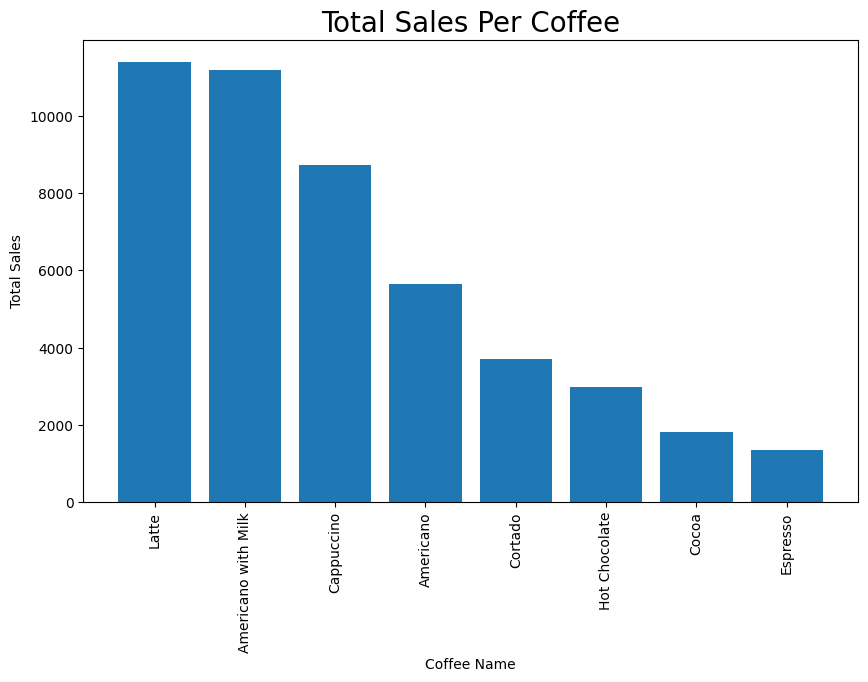

In [155]:
query = """

SELECT coffee_name, SUM(money) AS total_sales
FROM coffee_sales
GROUP BY coffee_name
ORDER BY total_sales DESC;

"""
# Establishing connection to database
conn = sqlite3.connect('miscellaneous.db')

# Load result into a DataFrame
df_sales = pd.read_sql_query(query, conn)

# Bar chart for sales by coffee type
plt.figure(figsize=(10,6))
plt.bar(df_sales['coffee_name'],
        df_sales['total_sales'])

plt.title('Total Sales Per Coffee', fontsize = 20)
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [156]:
%%sql
SELECT printf("%-30s", coffee_name) AS coffee_name,
       date,
       printf("%10s", SUM(money)) AS total_sales
FROM coffee_sales
WHERE coffee_name = 'Hot Chocolate'
GROUP BY date
ORDER BY date
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


coffee_name,date,total_sales
Hot Chocolate,1 03 2024,116.1
Hot Chocolate,1 04 2024,38.7
Hot Chocolate,10 04 2024,40.0
Hot Chocolate,10 06 2024,75.44
Hot Chocolate,11 06 2024,37.72


In [116]:
%%sql
SELECT
  printf("%-30s", coffee_name) AS coffee_name,
  date,
  printf("%10.2f", SUM(money)) AS total_sales
FROM coffee_sales
WHERE coffee_name = 'Hot Chocolate'
GROUP BY date
ORDER BY date
LIMIT 5;


 * sqlite:///miscellaneous.db
Done.


coffee_name,date,total_sales
Hot Chocolate,1 03 2024,116.10
Hot Chocolate,1 04 2024,38.70
Hot Chocolate,10 04 2024,40.00
Hot Chocolate,10 06 2024,75.44
Hot Chocolate,11 06 2024,37.72


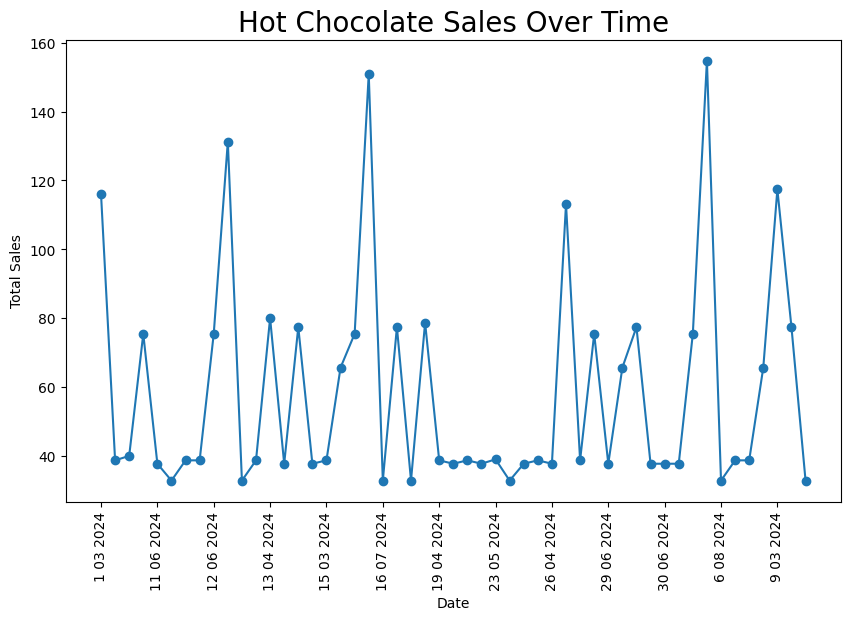

In [157]:
query = '''

SELECT coffee_name, date, SUM(money) AS total_sales
FROM coffee_sales
WHERE coffee_name = 'Hot Chocolate'
GROUP BY date
ORDER BY date;

'''
# Loading result into a DataFrame
df_sales = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.plot(df_sales['date'], df_sales['total_sales'], marker='o')
plt.title('Hot Chocolate Sales Over Time', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(range(0, len(df_sales['date']), 4),rotation=90)
plt.show()

In [158]:
%%sql
WITH RECURSIVE count_down AS (
    -- Base case: Start at 5
    SELECT 5 AS number

    UNION ALL -- Combining base case with recursive case

    -- Recursive case: Subtract 1 each time
    SELECT number - 1 FROM count_down
    WHERE number > 1  -- Stop when we reach 1
)
SELECT * FROM count_down;

 * sqlite:///miscellaneous.db
Done.


number
5
4
3
2
1


In [159]:
def add_data_to_database():
    try:
        conn = sqlite3.connect('miscellaneous.db')
        cursor = conn.cursor()
        # Create the sales table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS accessories (
            id INTEGER PRIMARY KEY,
            category_name TEXT,
            parent_id
        )
        ''')
        # Insert data into table
        data = [
            (1, 'Electronics', None),
            (2, 'Computers', 1),
            (3, 'Laptops', 2),
            (4, 'Desktops', 2),
            (5, 'Mobile Phones', 1),
            (6, 'Accessories', 5),
            (7, 'Cases', 6),
            (8, 'Headphones', 6)
        ]
        cursor.executemany(
            '''
            INSERT INTO accessories (id, category_name, parent_id) VALUES (?, ?, ?)
            ''', data
        )
        # Commit the changes
        conn.commit()
    except Exception as e:
        print(e)
    finally:
        conn.close()
# Calling function
add_data_to_database()

In [120]:
%%sql
SELECT * FROM accessories;

 * sqlite:///miscellaneous.db
Done.


id,category_name,parent_id
1,Electronics,None
2,Computers,1
3,Laptops,2
4,Desktops,2
5,Mobile Phones,1
6,Accessories,5
7,Cases,6
8,Headphones,6


In [160]:
%%sql
WITH RECURSIVE product_hierarchy AS (
    -- Base Case: Start with root categories (parent_id = NULL)
    SELECT
        id,
        category_name,
        parent_id,
        1 AS level
    FROM accessories
    WHERE parent_id IS NULL

    UNION ALL

    -- Recursive Case: Find child categories
    SELECT
        c.id,
        c.category_name,
        c.parent_id,
        ph.level + 1 AS level
    FROM accessories c
    INNER JOIN product_hierarchy ph
        ON c.parent_id = ph.id
)
SELECT * FROM product_hierarchy ORDER BY level, id;

 * sqlite:///miscellaneous.db
Done.


id,category_name,parent_id,level
1,Electronics,None,1
2,Computers,1,2
5,Mobile Phones,1,2
3,Laptops,2,3
4,Desktops,2,3
6,Accessories,5,3
7,Cases,6,4
8,Headphones,6,4


In [161]:
def add_data_to_dabase():
    try:
        conn = sqlite3.connect('miscellaneous.db')
        cursor = conn.cursor()
        # Create the sales table
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS work_records (
            id INTEGER PRIMARY KEY,
            first_name TEXT,
            days_worked INTEGER,
            earnings INTEGER,
            team_id INTEGER
        )
        ''')
        # Insert data into the work_records table
        data = [
            (1, 'John', 10, 2000, 101),
            (2, 'Mary', 15, 2500, 102),
            (3, 'Alice', 20, 3000, 103),
            (4, 'Alice', 18, 1700, 103),
            (5, 'Mary', 26, 4000, 102),
            (6, 'John', 17, 2600, 101)
        ]
        cursor.executemany(
            '''
            INSERT INTO work_records (id, first_name, days_worked, earnings, team_id)
            VALUES (?, ?, ?, ?, ?)
            ''', data
        )
        # Commit the changes
        conn.commit()
    except sqlite3.Error as e:
        print(e)
# Calling function
add_data_to_dabase()

In [162]:
%%sql
SELECT * FROM work_records;

 * sqlite:///miscellaneous.db
Done.


id,first_name,days_worked,earnings,team_id
1,John,10,2000,101
2,Mary,15,2500,102
3,Alice,20,3000,103
4,Alice,18,1700,103
5,Mary,26,4000,102
6,John,17,2600,101


In [163]:
%%sql
WITH RECURSIVE work_summary AS (
    -- Base case: Start with the first occurrence (minimum ID) of each employee
    SELECT
        id,
        first_name,
        days_worked AS accumulated_days,
        earnings AS accumulated_earnings
    FROM work_records
    WHERE id IN (SELECT MIN(id) FROM work_records GROUP BY first_name)

    UNION ALL -- Combining base case with recursive step

    -- Recursive case: Accumulate days worked and earnings for each employee
    SELECT
        w.id,
        w.first_name,
        ws.accumulated_days + w.days_worked,
        ws.accumulated_earnings + w.earnings
    FROM work_records w
    JOIN work_summary ws
    ON ws.first_name = w.first_name AND w.id > ws.id
)
SELECT
    first_name,
    MAX(accumulated_earnings) AS total_accumulative,
    MAX(accumulated_days) AS total_accumulative_days
FROM work_summary
GROUP BY first_name;

 * sqlite:///miscellaneous.db
Done.


first_name,total_accumulative,total_accumulative_days
Alice,4700,38
John,4600,27
Mary,6500,41


In [ ]:
def add_data_to_database(input_data):
    try:
        # Creating a DataFrame
        df = pd.read_csv(input_data)
        # Connecting to database
        engine = sqlite3.connect("miscellaneous.db")
        df.to_sql("transport", con=engine, index = False)
    except (ValueError, sqlite3.Error) as e:
            print(f'Error: {e}')

# Loading data
input_data = "/content/yellow_tripdata_2016-01.csv"
add_data_to_database(input_data)

In [165]:
%%sql
PRAGMA table_info(transport)

 * sqlite:///miscellaneous.db
Done.


cid,name,type,notnull,dflt_value,pk
0,VendorID,INTEGER,0,None,0
1,tpep_pickup_datetime,TEXT,0,None,0
2,tpep_dropoff_datetime,TEXT,0,None,0
3,passenger_count,INTEGER,0,None,0
4,trip_distance,REAL,0,None,0
5,pickup_longitude,REAL,0,None,0
6,pickup_latitude,REAL,0,None,0
7,RatecodeID,INTEGER,0,None,0
8,store_and_fwd_flag,TEXT,0,None,0
9,dropoff_longitude,REAL,0,None,0


In [166]:
%%sql
SELECT COUNT(*) AS count_of_rows
FROM transport;

 * sqlite:///miscellaneous.db
Done.


count_of_rows
10906858


In [128]:
# %%sql
# DROP TABLE transport;

In [167]:
%%sql
SELECT
    tpep_pickup_datetime,
    fare_amount,
    tip_amount,
    total_amount
FROM transport
LIMIT 5;

 * sqlite:///miscellaneous.db
Done.


tpep_pickup_datetime,fare_amount,tip_amount,total_amount
2016-01-01 00:00:00,7.5,0.0,8.8
2016-01-01 00:00:00,18.0,0.0,19.3
2016-01-01 00:00:00,33.0,0.0,34.3
2016-01-01 00:00:00,16.5,0.0,17.3
2016-01-01 00:00:00,8.0,0.0,8.8


In [168]:
%%sql
SELECT
    fare_amount
    tip_amount,
    total_amount
FROM transport
LIMIT 5 OFFSET 10;

 * sqlite:///miscellaneous.db
Done.


tip_amount,total_amount
6.0,7.3
12.0,17.29
2.5,3.8
14.0,18.35
11.0,13.8


In [169]:
%%time
%%sql
SELECT
    VendorID,
    trip_distance,
    'Short Trip' AS trip_category
FROM transport
WHERE trip_distance < (SELECT AVG(trip_distance) FROM transport)
       AND tpep_pickup_datetime = '2016-01-01 00:00:00'

UNION ALL -- Using UNION ALL combine the queries

SELECT
    VendorID,
    trip_distance,
    'Long Trip' AS trip_category
FROM transport
WHERE trip_distance >= (SELECT AVG(trip_distance) FROM transport)
      AND tpep_pickup_datetime = '2016-01-01 00:00:00';

 * sqlite:///miscellaneous.db
Done.
CPU times: user 4.84 s, sys: 2.37 s, total: 7.21 s
Wall time: 7.28 s


VendorID,trip_distance,trip_category
2,1.1,Short Trip
2,1.76,Short Trip
2,4.9,Long Trip
2,10.54,Long Trip
2,4.75,Long Trip
2,5.52,Long Trip
2,7.45,Long Trip


In [170]:
%%sql
EXPLAIN QUERY PLAN
SELECT
    VendorID,
    trip_distance,
    'Short Trip' AS trip_category
FROM transport
WHERE trip_distance < (SELECT AVG(trip_distance) FROM transport)
       AND tpep_pickup_datetime = '2016-01-01 00:00:00'

UNION ALL -- Using UNION ALL combine the queries

SELECT
    VendorID,
    trip_distance,
    'Long Trip' AS trip_category
FROM transport
WHERE trip_distance >= (SELECT AVG(trip_distance) FROM transport)
      AND tpep_pickup_datetime = '2016-01-01 00:00:00';

 * sqlite:///miscellaneous.db
Done.


id,parent,notused,detail
1,0,0,COMPOUND QUERY
2,1,0,LEFT-MOST SUBQUERY
4,2,0,SCAN transport
10,2,0,SCALAR SUBQUERY 1
15,10,0,SCAN transport
34,1,0,UNION ALL
36,34,0,SCAN transport
42,34,0,SCALAR SUBQUERY 3
47,42,0,SCAN transport


In [171]:
%%time
%%sql
WITH avg_trip AS (
    SELECT AVG(trip_distance) AS avg_distance FROM transport
)
SELECT
    t.VendorID,
    t.trip_distance,
    CASE
        WHEN t.trip_distance < a.avg_distance THEN 'Short Trip'
        ELSE 'Long Trip'
    END AS trip_category
FROM transport t
JOIN avg_trip a ON 1=1
WHERE t.tpep_pickup_datetime = '2016-01-01 00:00:00';

 * sqlite:///miscellaneous.db
Done.
CPU times: user 1.93 s, sys: 929 ms, total: 2.86 s
Wall time: 2.86 s


VendorID,trip_distance,trip_category
2,1.1,Short Trip
2,4.9,Long Trip
2,10.54,Long Trip
2,4.75,Long Trip
2,1.76,Short Trip
2,5.52,Long Trip
2,7.45,Long Trip


In [172]:
%%sql
EXPLAIN QUERY PLAN
WITH avg_trip AS (
    SELECT AVG(trip_distance) AS avg_distance FROM transport
)
SELECT
    t.VendorID,
    t.trip_distance,
    CASE
        WHEN t.trip_distance < a.avg_distance THEN 'Short Trip'
        ELSE 'Long Trip'
    END AS trip_category
FROM transport t
JOIN avg_trip a ON 1=1
WHERE t.tpep_pickup_datetime = '2016-01-01 00:00:00';

 * sqlite:///miscellaneous.db
Done.


id,parent,notused,detail
3,0,0,MATERIALIZE avg_trip
7,3,0,SCAN transport
22,0,0,SCAN a
24,0,0,SCAN t


In [173]:
%%sql
CREATE INDEX idx_pickup_time_distance ON transport(tpep_pickup_datetime, trip_distance);

 * sqlite:///miscellaneous.db
Done.


[]

In [174]:
%%time
%%sql
WITH avg_trip AS (
    SELECT AVG(trip_distance) AS avg_distance FROM transport
)
SELECT
    t.VendorID,
    t.trip_distance,
    CASE
        WHEN t.trip_distance < a.avg_distance THEN 'Short Trip'
        ELSE 'Long Trip'
    END AS trip_category
FROM transport t
JOIN avg_trip a ON 1=1
WHERE t.tpep_pickup_datetime = '2016-01-01 00:00:00';

 * sqlite:///miscellaneous.db
Done.
CPU times: user 722 ms, sys: 132 ms, total: 855 ms
Wall time: 855 ms


VendorID,trip_distance,trip_category
2,1.1,Short Trip
2,1.76,Short Trip
2,4.75,Long Trip
2,4.9,Long Trip
2,5.52,Long Trip
2,7.45,Long Trip
2,10.54,Long Trip
